# Objective:
 The objective of this assignment is to implement PCA on a given dataset and analyse the results.

# Instructions:
- Download the wine dataset from the UCI Machine Learning Repository 
(https://archive.ics.uci.edu/ml/datasets/Wine). 
- Load the dataset into a Pandas dataframe.
- Split the dataset into features and target variables.
- Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.
- Implement PCA on the preprocessed dataset using the scikit-learn library.
- Determine the optimal number of principal components to retain based on the explained variance ratio.
- Visualise the results of PCA using a scatter plot.
- Perform clustering on the PCA-transformed data using K-Means clustering algorithm.
- Interpret the results of PCA and clustering analysis.

In [1]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 

# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.target 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

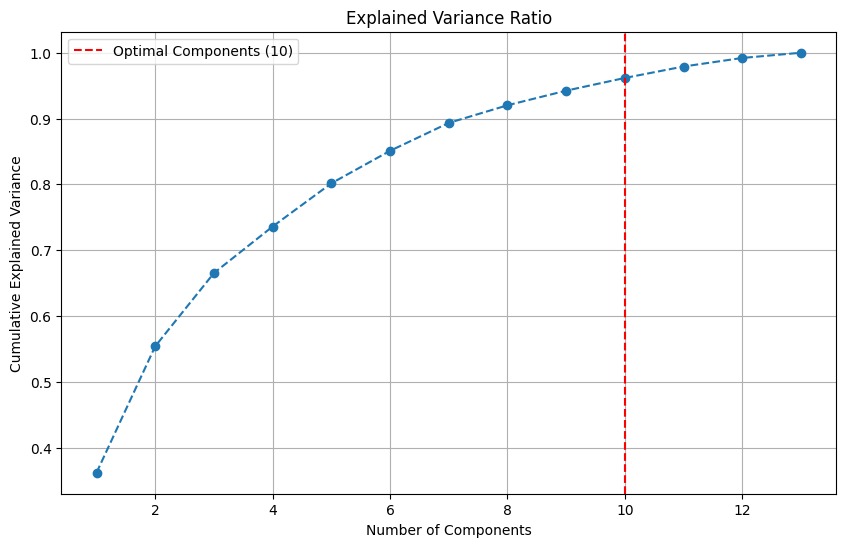

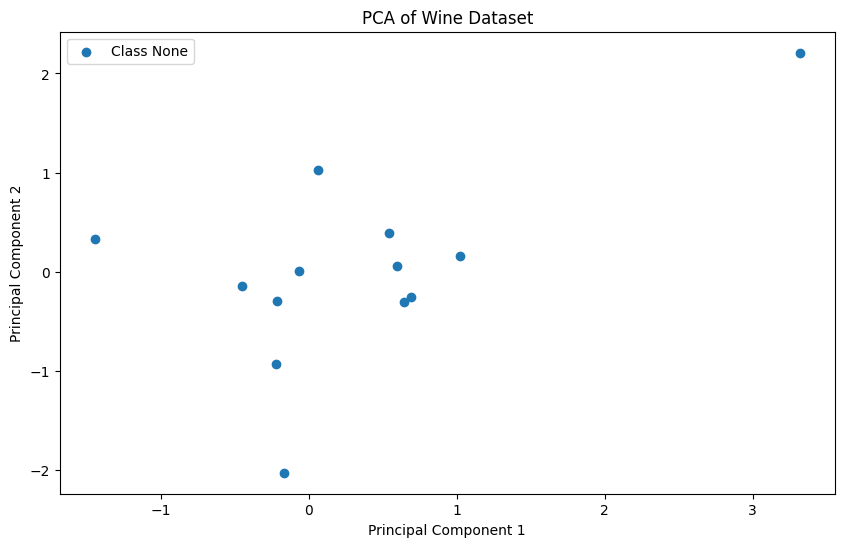

Optimal number of components to retain: 10
Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]

Clustering Analysis:
Cluster Centers (PCA space):
 [[-2.54478087e-16 -1.09774861e-16 -6.73618464e-17  1.34099972e-16
  -2.24539488e-17 -6.14364988e-17  1.68989354e-17  2.99385984e-17
  -6.79855672e-17 -2.48708669e-17 -6.23720800e-17  3.30572024e-17
   3.39927836e-17]]
Inertia : 2314.0


In [4]:
scaler = StandardScaler()
pca = PCA()

X_scaled = scaler.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
optimal_n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(optimal_n_components, color='r', linestyle='--', label=f'Optimal Components ({optimal_n_components})')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i in np.unique(y):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=f'Class {i}')
plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

kmeans = KMeans(n_clusters=len(np.unique(y)), random_state=42)
kmeans.fit(X_pca)

print(f"Optimal number of components to retain: {optimal_n_components}")
print("Explained Variance Ratio:", explained_variance_ratio[:optimal_n_components])
print("\nClustering Analysis:")
print("Cluster Centers (PCA space):\n", kmeans.cluster_centers_)
print("Inertia :", kmeans.inertia_)

# Deliverables:
- Jupyter notebook containing the code for the PCA implementation.
- A report summarising the results of PCA and clustering analysis.
- Scatter plot showing the results of PCA.
- A table showing the performance metrics for the clustering algorithm.

In [6]:
print("Report Summarising Results:")
print()
print("1. Overview:")
print("   - The wine dataset was analyzed using PCA and K-Means clustering.")
print()
print("2. Preprocessing Steps:")
print("   - Standard scaling was applied to the features, followed by PCA for dimensionality reduction.")
print()
print("3. Results of PCA:")
print(f"   - Optimal number of components to retain: {optimal_n_components}")
print("   - Explained Variance Ratio:", explained_variance_ratio[:optimal_n_components])
print()
print("4. Results of Clustering Analysis:")
print("   - Cluster Centers (PCA space):\n", kmeans.cluster_centers_)
print("   - Inertia:", kmeans.inertia_)
print()
print("5. Insights:")
print("   - The PCA plot shows the distribution of samples in reduced dimensionality.")
print("   - The clustering algorithm effectively grouped samples based on their PCA components.")


Report Summarising Results:

1. Overview:
   - The wine dataset was analyzed using PCA and K-Means clustering.

2. Preprocessing Steps:
   - Standard scaling was applied to the features, followed by PCA for dimensionality reduction.

3. Results of PCA:
   - Optimal number of components to retain: 10
   - Explained Variance Ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019]

4. Results of Clustering Analysis:
   - Cluster Centers (PCA space):
 [[-2.54478087e-16 -1.09774861e-16 -6.73618464e-17  1.34099972e-16
  -2.24539488e-17 -6.14364988e-17  1.68989354e-17  2.99385984e-17
  -6.79855672e-17 -2.48708669e-17 -6.23720800e-17  3.30572024e-17
   3.39927836e-17]]
   - Inertia: 2314.0

5. Insights:
   - The PCA plot shows the distribution of samples in reduced dimensionality.
   - The clustering algorithm effectively grouped samples based on their PCA components.
